In [ ]:
from tensorflow import keras
from keras import models, layers, regularizers

# Load the MNIST dataset
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize and split the data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# Define the model architecture
model = models.Sequential([
    # Flatten input layer for 28x28 images
    # - Converts each 28x28 image into a single vector with 784 values (28 * 28 = 784).
    # - No parameters are created here because this layer just restructures the input data.
    layers.Flatten(input_shape=[28, 28]),  
    
    # First dense layer with 300 neurons and ReLU activation.
    # - Uses He-normal initialization (good for layers with ReLU activation) which assigns initial weights based 
    #   on a normal distribution scaled by the number of neurons in the previous layer.
    # - 235,500 parameters: 784 weights per neuron * 300 neurons + 300 biases (1 bias per neuron).
    layers.Dense(300, kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.01)),
    
    # Batch normalization layer for 300 neurons
    # - This layer normalizes outputs by adjusting the mean and variance, stabilizing the learning process.
    # - Learnable parameters (300 gamma and 300 beta) help adjust the scale and shift.
    # - Non-learnable parameters (mean and variance per neuron) are calculated per batch and are averaged 
    #   across batches during training.
    # - Total of 1,200 parameters: (300 neurons * 4 values: gamma, beta, mean, variance).
    layers.BatchNormalization(),
    
    # ReLU activation applies the function max(0, x) to introduce non-linearity.
    layers.Activation("relu"),
    
    # Second dense layer with 100 neurons and ReLU activation.
    # - He-normal initialization for weight scaling.
    # - 30,100 parameters: 300 weights per neuron * 100 neurons + 100 biases.
    layers.Dense(100, kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.01)),
    
    # Batch normalization layer for 100 neurons.
    # - 400 parameters: (100 neurons * 4 values: gamma, beta, mean, variance).
    layers.BatchNormalization(),
    
    # ReLU activation
    layers.Activation("relu"),
    
    # Dropout layer with a 0.3 dropout rate to reduce overfitting.
    # - This layer randomly sets 30% of the neurons' outputs to zero during each training step, encouraging 
    #   the network to rely on all neurons rather than a few.
    # - No parameters are created here.
    layers.Dropout(0.3),
    
    # Output layer with 10 neurons, one for each MNIST class (digits 0-9), using softmax for multiclass 
    # classification probabilities.
    # - 1,010 parameters: 100 weights per neuron * 10 neurons + 10 biases.
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Display the model summary
model.summary()
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=32)


c:\Users\intel\Desktop\ai cep\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,210 (1.02 MB)

 Trainable params: 267,410 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8596 - loss: 2.4503 - val_accuracy: 0.9394 - val_loss: 0.4938
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.9134 - loss: 0.5608 - val_accuracy: 0.9328 - val_loss: 0.4918
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9195 - loss: 0.5405 - val_accuracy: 0.9456 - val_loss: 0.4572
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9241 - loss: 0.5151 - val_accuracy: 0.9504 - val_loss: 0.4168
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.9283 - loss: 0.4718 - val_accuracy: 0.9458 - val_loss: 0.4165
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9328 - loss: 0.4399 - val_accuracy: 0.9506 - val_loss: 0.3692
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9377 - loss: 0.4063 - val_accuracy: 0.9612 - val_loss: 0.3273
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9381 -

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models, layers, regularizers

# 1. Load and preprocess the MNIST data
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize the data (pixel values between 0 and 1)
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# 2. Define the model architecture
model = models.Sequential([
    layers.Flatten(input_shape=[28, 28]),  # Flatten 28x28 images into a single vector
    
    layers.Dense(300, kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.01)),  # Dense layer with L2 regularization
    layers.BatchNormalization(),
    layers.Activation("relu"),
    
    layers.Dense(100, kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.01)),  # Another dense layer
    layers.BatchNormalization(),
    layers.Activation("relu"),
    
    layers.Dropout(0.3),  # Dropout to prevent overfitting
    
    layers.Dense(10, activation="softmax")  # Output layer for classification (10 classes)
])

# 3. Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
# 4. Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=32)

# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


c:\Users\intel\Desktop\ai cep\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,210 (1.02 MB)

 Trainable params: 267,410 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8578 - loss: 2.4442 - val_accuracy: 0.9348 - val_loss: 0.5012
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9128 - loss: 0.5649 - val_accuracy: 0.9484 - val_loss: 0.4713
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9217 - loss: 0.5464 - val_accuracy: 0.9206 - val_loss: 0.5171
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9264 - loss: 0.5078 - val_accuracy: 0.9510 - val_loss: 0.4097
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9326 - loss: 0.4616 - val_accuracy: 0.9488 - val_loss: 0.4010
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9353 - loss: 0.4325 - val_accuracy: 0.9498 - val_loss: 0.3639
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step - accuracy: 0.9366 - loss: 0.4009 - val_accuracy: 0.9414 - val_loss: 0.3856
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9386 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


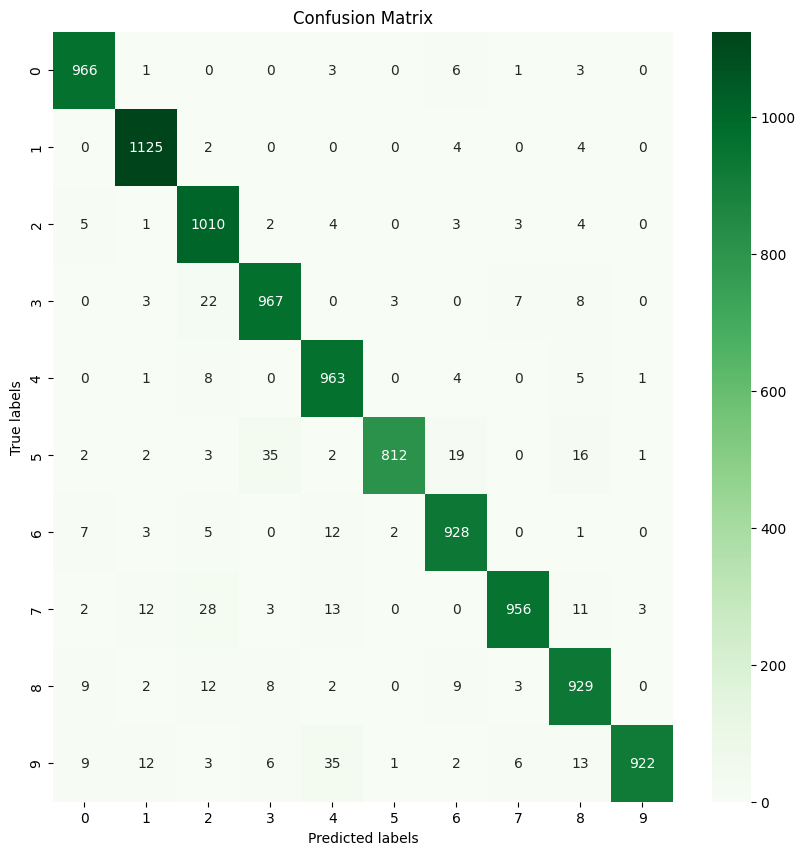

In [6]:
from sklearn.metrics import confusion_matrix  # Import confusion_matrix
import seaborn as sb
# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)
confusion_mtx = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(10)]

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Greens', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
This digit is probably a 1
Prediction probabilities: [[6.7825610e-04 8.3363116e-01 5.8492888e-02 9.0410747e-03 2.8486276e-04
  7.8124255e-02 1.7005276e-04 1.8633317e-02 2.5319794e-04 6.9088890e-04]]


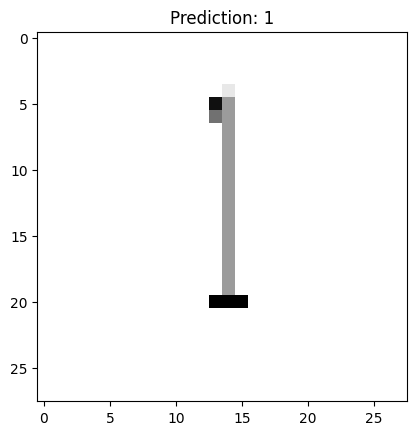

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This digit is probably a 2
Prediction probabilities: [[5.0919582e-05 5.7885185e-04 9.6475738e-01 4.7408190e-04 1.3889795e-07
  6.7909909e-03 8.4032537e-03 1.0222255e-05 1.8934166e-02 3.2358477e-10]]


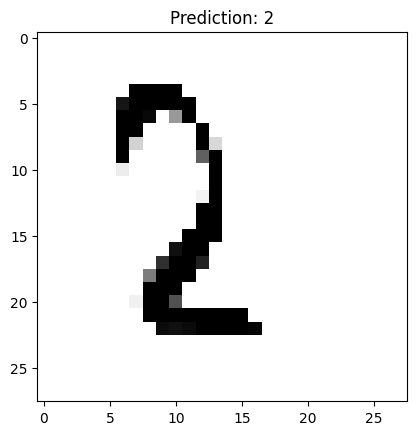

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This digit is probably a 3
Prediction probabilities: [[1.7414901e-04 1.9709285e-02 7.4770879e-03 9.3407112e-01 1.2921773e-04
  7.8400988e-03 7.2267271e-06 2.2471787e-02 7.2604307e-04 7.3940312e-03]]


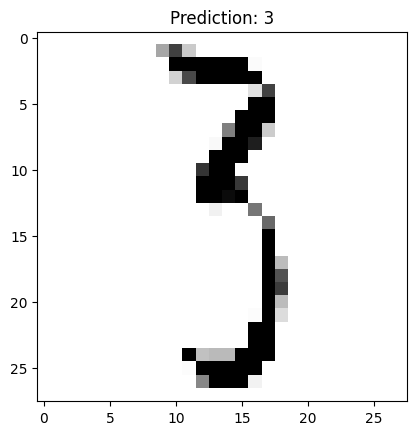

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 4
Prediction probabilities: [[1.2223718e-07 2.6942095e-01 6.7280128e-04 2.3731710e-03 6.9438511e-01
  2.8360507e-03 6.1171391e-04 1.9944072e-04 2.3840072e-02 5.6606536e-03]]


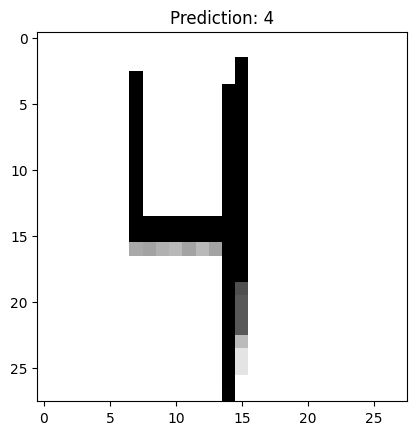

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This digit is probably a 5
Prediction probabilities: [[8.2972198e-05 2.5213443e-04 5.6565803e-04 1.3422656e-01 1.5898257e-05
  8.6124533e-01 3.5149275e-04 6.4931759e-05 1.7841501e-03 1.4109098e-03]]


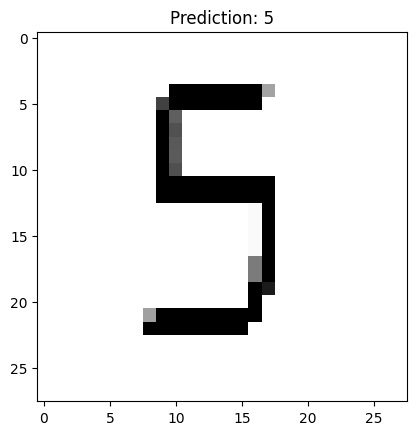

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This digit is probably a 6
Prediction probabilities: [[6.6721048e-03 1.0025953e-04 2.0648539e-03 1.6515066e-04 9.2616305e-03
  2.3859330e-02 9.4346410e-01 7.2771183e-04 1.2101685e-02 1.5832635e-03]]


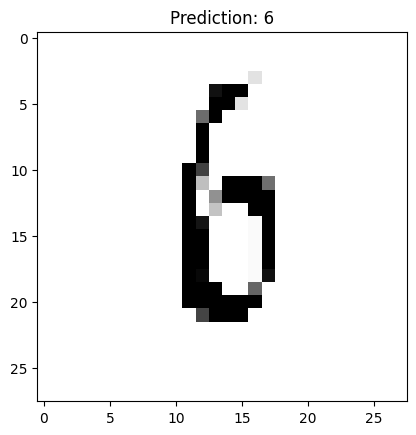

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
This digit is probably a 1
Prediction probabilities: [[5.9453532e-06 6.9354117e-01 9.4371222e-02 9.3720667e-02 3.9667762e-03
  1.4397473e-04 1.9858133e-04 1.1059444e-01 3.4122364e-04 3.1160798e-03]]


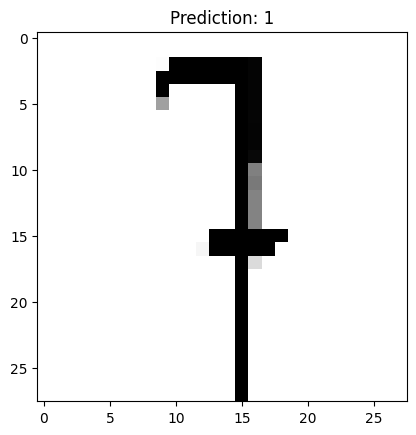

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This digit is probably a 8
Prediction probabilities: [[1.28470667e-04 3.00774537e-03 1.98636409e-02 2.61879154e-02
  1.00425204e-04 1.00719966e-02 2.30698293e-04 1.53761380e-03
  9.33814645e-01 5.05692093e-03]]


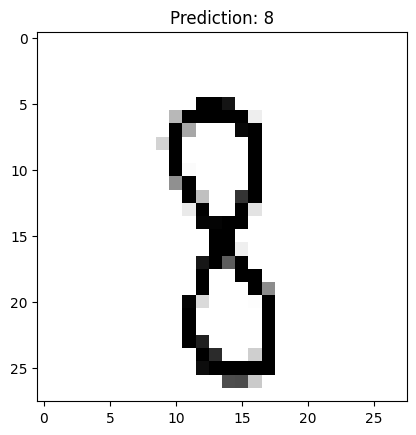

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
This digit is probably a 9
Prediction probabilities: [[1.57225459e-05 1.12474136e-01 4.21447476e-04 3.58768962e-02
  3.19184475e-02 3.99182178e-02 1.53398614e-05 6.20006584e-03
  2.85776198e-01 4.87383574e-01]]


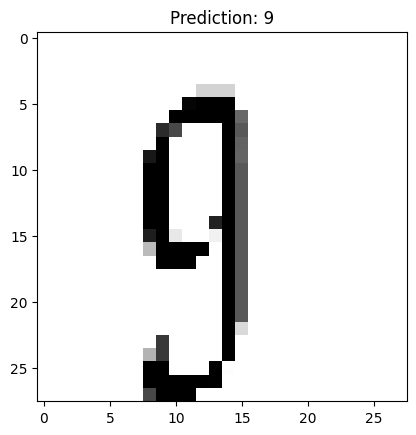

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

picno = 1
while os.path.isfile(f'digit/digit{picno}.png'):
    try:
        # Load and process the image
        img = cv2.imread(f'digit/digit{picno}.png', cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Image {picno} could not be loaded.")
            picno += 1
            continue
        
        # Resize and invert (if needed) and normalize the image
        img = cv2.resize(img, (28, 28))
        img = np.invert(img)  # Optional: Invert if your images are white on black
        img = img / 255.0  # Normalize pixel values (0-1)

        # Add batch dimension
        img = img.reshape(1, 28, 28)

        # Predict the digit
        prediction = model.predict(img)
        predicted_digit = np.argmax(prediction)
        print(f'This digit is probably a {predicted_digit}')
        print("Prediction probabilities:", prediction)

        # Display the image and prediction
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.title(f'Prediction: {predicted_digit}')
        plt.show()

    except Exception as e:
        print(f'Error processing image {picno}: {e}')
    finally:
        picno += 1

